In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
class triangulo_magico:
    '''
    @Autores: Juan Esteban Gonzalez y Leonardo Luengas
    
    Clase que construye un triangulo mágico con n nodos en cada arista.
    Objetivo: Encontrar una asignación de los números naturales del 1 hasta el 3(n-1) de tal forma que la suma de todos los
    números en cada arista sea igual y no se repitan números en ningún nodo.
    Input: n, numero de vértices por lado
    Output: triángulo mágico de n vértices por lado
    '''
    def __init__(self, n=3):
        '''
        Inicializa el triángulo mágico con 0 en cada uno de los nodos de las aristas y n vértices en cada lado.
        '''
        self.estado_inicial=[0 for x in range(3*(n-1))]
        self.vertices = n
        
    def pintar_estado(self,estado):
        '''
        Input: recibe una lista que representa un estado del triángulo mágico con n vértices en cada lado
        Output: Dibuja la representación gráfica del triángulo mágico
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        G = nx.Graph()
        G.add_nodes_from(estado)
        estado1 = estado[1:]
        estado1.append(estado[0])
        E = [e for e in zip(estado,estado1)]
        G.add_edges_from(E)
        order = {}
        n = self.vertices
        for i in range(n):
            e1 = estado[i]
            e2 = estado[i+n-1]
            e3 = estado[i+2*(n-1)-1]
            order[e1] = [i,0]
            order[e2] = [(n-1)-(i/2),(np.sqrt(3)*i)/2]
            order[e3] = [(n-i)/2,(np.sqrt(3)*(n-i))/2]
        nx.draw_networkx(G,pos=order)
        plt.show()
        
    def acciones_aplicables(self, estado):
        '''
        Input: estado, una lista que representa el triángulo mágico con n vértices en cada lado
        Output: Una lista con todas las parejas ordenadas que se pueden generar
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        res = []
        tot = 3*(self.vertices-1)+1
        for x, v in enumerate(estado):
            temp = [(x,y) for y in range(1,tot) if v != y]
            res = res + temp
        return res
    
    def transicion(self, estado, accion):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
               accion, una tupla con dos elementos que representan el índice de un elemento de la lista y el valor con el cual
               se va a reemplazar dicho índice.
        Output: lista con la acción ya aplicada
        '''
        estado[accion[0]]=accion[1]
        return estado
    
    def test_objetivo(self, estado):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
        Output: Booleano que representa si el estado satisface el objetivo del problema
        '''
        setl=set(estado)
        if len(setl) !=len(estado) or (0 in estado):
            return False
        n = self.vertices
        fila1 = [estado[x] for x in range(0,n)]
        fila2 = [estado[x] for x in range(n-1,2*n-1)]
        fila3 = [estado[x] for x in range(2*(n-1),len(estado))]
        fila3.append(estado[0])
        matrix = np.matrix([fila1,fila2,fila3]).sum(axis=1)
        x = matrix[0]
        return (x==matrix).all()
        
    def costo(self, estado, accion):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
               accion, una tupla con dos elementos que representan el índice de un elemento de la lista y el valor con el cual
               se va a reemplazar dicho índice.
        Output:int, entero positivo que representa el costo de realizar la acción sobre el triángulo
        '''
        return 1
    
    def codigo(self, estado):
        '''
        Input: estado, una lista que representa un estado del problema del triángulo mágico con n vértices en cada lado
        Output: string, que representa el estado
        '''
        assert len(estado) == len(self.estado_inicial), f"{estado} no es compatible con un triangulo mágico de {self.vertices} vértices" 
        cod = ''
        for x in estado:
            cod += str(x)
        return cod       

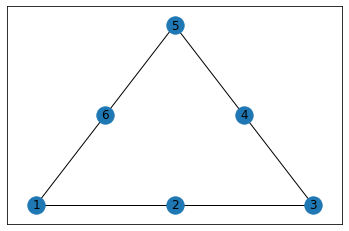

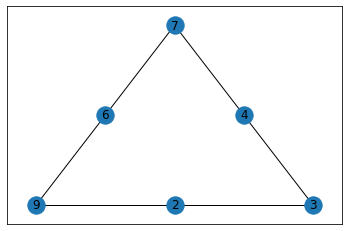

In [19]:
prob = triangulo_magico()
prob.test_objetivo([1,2,3,4,5,6])
prob.pintar_estado([1,2,3,4,5,6])
prob.pintar_estado([9,2,3,4,7,6])

In [6]:
def primero_en_anchura(problema):
    estado=problema.estado_inicial
    if problema.test_objetivo(estado):
        return estado
    frontera=[estado]
    while len(frontera)>0:
        estado=frontera.pop(0)
        for accion in problema.acciones_aplicables(estado):
            hijo=problema.transicion(estado, accion)
            if problema.test_objetivo(hijo):
                return hijo
            frontera.append(hijo)

In [36]:
%%time
print('Buscando solución en anchura...')
l = primero_en_anchura(prob)
if l is not None:
    print('La solución encontrada es:')
    prob.pintar_estado(l)
else:
    print('No se encontró una solución!')

Buscando solución en anchura...
La solución encontrada es:


ValueError: all nodes must have subset_key (default='subset') as data

In [7]:
print(l)
prob.test_objetivo(l)

NameError: name 'l' is not defined

In [1]:
p = triangulo_magico(5)
p.codigo()
print(len(p.estado_inicial))
p.pintar_estado([i for i in range(12)])

NameError: name 'triangulo_magico' is not defined